In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hrdataset/HR_comma_sep.csv
/kaggle/input/dataset-csv/insurance_data.csv


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [81]:
df = pd.read_csv("/kaggle/input/dataset-csv/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [82]:
df.shape

(27, 2)

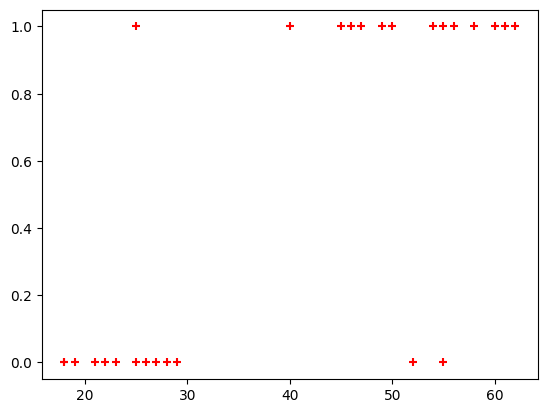

In [83]:
plt.scatter(df['age'], df['bought_insurance'], marker = '+', color = 'red')

# As you can see the plot, we can't actually draw a line because the data is distributed on top and bottom

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((21, 1), (6, 1))

In [85]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [86]:
y_pred = model.predict(X_test)

y_pred, y_test

# As you can see, the model is getting every answers right

(array([1, 0, 1, 0, 0, 0]),
 8     1
 13    0
 9     1
 21    0
 0     0
 11    0
 Name: bought_insurance, dtype: int64)

In [87]:
model.score(X_test, y_test)

# Our model is perfect

1.0

In [88]:
age_sorted = np.sort(df.age)

probabilities = model.predict_proba(age_sorted.reshape(-1, 1))[:, 1]
probabilities

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.1073847 , 0.1073847 , 0.11871444, 0.14448766, 0.15903454,
       0.17474682, 0.20978901, 0.20978901, 0.22914939, 0.24973178,
       0.27151175, 0.29444574, 0.59144934, 0.71815862, 0.740472  ,
       0.76160524, 0.80021757, 0.81768362, 0.84901371, 0.87577782,
       0.88756613, 0.88756613, 0.8983656 , 0.91723431, 0.93286179,
       0.93960657, 0.94571319])

In [89]:
age_sorted.reshape(-1, 1)

# this is the 2D array, that we had to give to the predict_proba()

array([[18],
       [18],
       [19],
       [21],
       [22],
       [23],
       [25],
       [25],
       [26],
       [27],
       [28],
       [29],
       [40],
       [45],
       [46],
       [47],
       [49],
       [50],
       [52],
       [54],
       [55],
       [55],
       [56],
       [58],
       [60],
       [61],
       [62]])

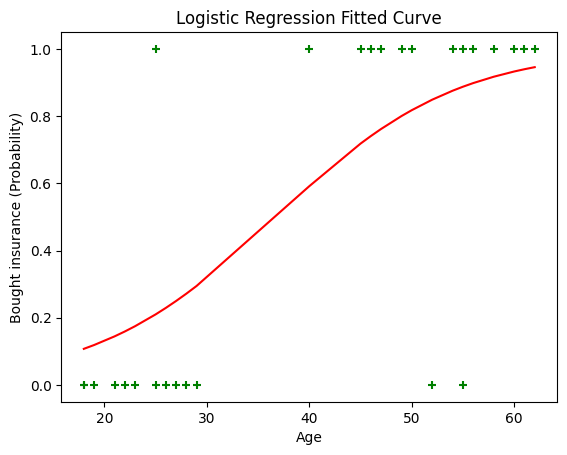

In [90]:
plt.xlabel("Age")
plt.ylabel("Bought insurance (Probability)")
plt.scatter(df.age, df.bought_insurance, marker = '+', color = 'green', label='Actual Data')

plt.plot(age_sorted, probabilities, color = "red", label='Logistic Regression Curve')

plt.title('Logistic Regression Fitted Curve')
plt.show()

## EXERCISE

In [91]:
df = pd.read_csv("/kaggle/input/hrdataset/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [92]:
df.shape

(14999, 10)

In [93]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [94]:
X = df.drop(columns = ['left'])
y = df['left'] 

X.shape, y.shape

((14999, 9), (14999,))

<Axes: xlabel='salary'>

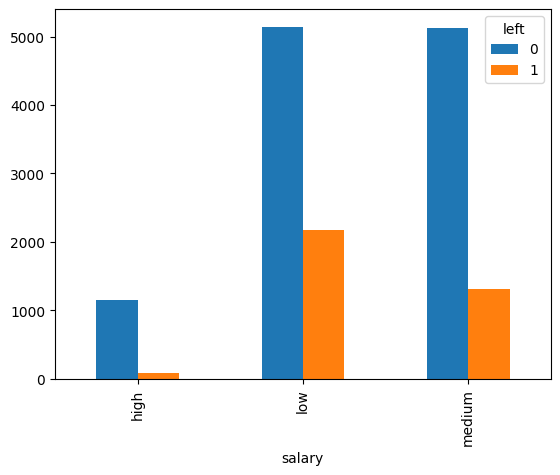

In [95]:
# Impact of salary on employee retention

pd.crosstab(df.salary, df.left).plot(kind='bar')

<Axes: xlabel='Department'>

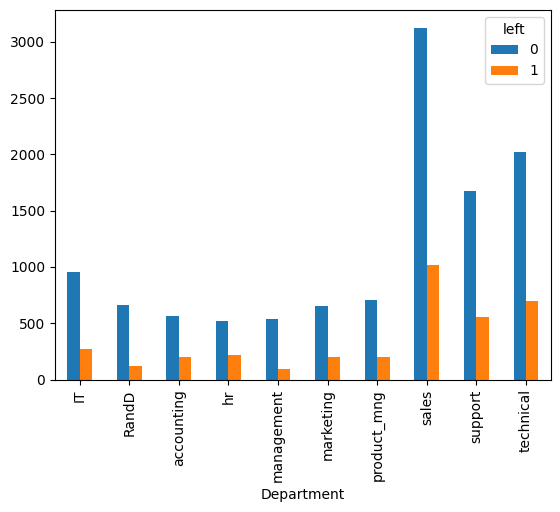

In [96]:
# Department wise employee retention rate

pd.crosstab(df.Department, df.left).plot(kind='bar')

## DATA PROCESSING

In [97]:
df.dtypes

# we have two categorical columns , that has to be converted to the nmerical type 

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [98]:
df.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [99]:
dummies = pd.get_dummies(df.salary, prefix='salary').astype(int)
dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [100]:
dfr = df.drop(columns = ['salary'])

dfr = pd.concat([dfr, dummies], axis = 1)
dfr.sample(10)

# Okay now we are done with the salary column, lets check the type again

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_high,salary_low,salary_medium
6666,0.88,0.57,4,185,2,0,0,0,sales,0,1,0
9775,0.94,0.87,4,157,3,0,0,0,technical,0,0,1
3299,0.79,0.53,2,217,2,0,0,0,sales,0,0,1
2577,0.51,0.48,5,136,4,0,0,0,management,0,1,0
6878,0.74,0.80,3,219,2,0,0,0,marketing,0,0,1
4277,0.95,0.58,3,193,2,0,0,0,accounting,0,0,1
2594,0.99,0.72,3,119,2,1,0,0,marketing,0,1,0
9761,0.98,0.99,4,132,2,0,0,0,product_mng,0,0,1
9934,0.58,0.50,5,184,4,0,0,0,sales,0,0,1
9017,0.89,0.86,3,261,4,0,0,0,sales,0,1,0


In [101]:
dfr.dtypes

# Only department is left

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary_high                int64
salary_low                 int64
salary_medium              int64
dtype: object

In [102]:
dfr.Department.value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [107]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
dfr['Department_encoded'] = le.fit_transform(dfr['Department'])
dfr['Department_encoded'].sample(10)

1708     2
12124    8
4688     3
2467     7
2682     7
10319    7
7068     9
6125     7
10795    3
11479    1
Name: Department_encoded, dtype: int64

In [108]:
ohe = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoded_departments = ohe.fit_transform(dfr[['Department_encoded']])
encoded_departments

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [109]:
ohe_df = pd.DataFrame(
    encoded_departments,
    columns=ohe.get_feature_names_out(['Department_encoded'])
)

print("After One-Hot Encoding (Dummy Variables):")
print(ohe_df.head())

After One-Hot Encoding (Dummy Variables):
   Department_encoded_0  Department_encoded_1  Department_encoded_2  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   Department_encoded_3  Department_encoded_4  Department_encoded_5  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   Department_encoded_6  Department_encoded_7  Department_encoded_8  \
0                   0.0          

In [110]:
dfr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_high,salary_low,salary_medium,Department_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0,7
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1,7
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1,7
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0,7
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0,7


In [111]:
# Lets drop department and department_encdod

dfr = dfr.drop(columns=['Department', 'Department_encoded'])
dfr = pd.concat([dfr, ohe_df], axis=1)
dfr.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,Department_encoded_0,Department_encoded_1,Department_encoded_2,Department_encoded_3,Department_encoded_4,Department_encoded_5,Department_encoded_6,Department_encoded_7,Department_encoded_8,Department_encoded_9
4896,0.50,0.78,6,138,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9103,0.55,0.75,3,191,3,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1145,0.37,0.49,2,153,3,0,1,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10096,0.29,0.40,4,138,4,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7790,0.28,0.66,3,184,2,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10288,0.88,0.59,4,227,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
648,0.45,0.54,2,129,3,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13170,0.31,0.42,4,108,4,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2941,0.67,0.52,2,102,6,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8583,0.78,0.61,3,227,3,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
X = dfr.drop(columns = ['left'])
y = dfr['left']
X.shape, y.shape

((14999, 20), (14999,))

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [115]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
y_pred = model.predict(X_test)

In [117]:
model.score(X_test, y_test)

0.7783333333333333